# **Task P7**
## Analyzing the Avocado Data

##### This task uses the avocado dataset. The dataset contains historical data on avocado prices and sales volume in multiple U.S. markets. One of the columns in this dataset, Unnamed: 0, contains sequential numbers that are irrelevant to analyzing this data. Three of the other columns contain sales for PLU (price look-up) codes 4046, 4225, and 4770. These columns will not be used in this task. If you review the data, you’ll see that some of the regions overlap. For example, one of the regions is the entire U.S., and all of the other regions are parts of the U.S. Because of that, you would need to review this data carefully before determining the best way to analyze it. For the purposes of this task though, the overlapping regions won’t be taken into consideration.

##### https://www.kaggle.com/neuromusic/avocado-prices

<img src="avocado-logo.png" alt="SIT112 Avocado!" width="1800" height="200">


### A. Instructions

1. Complete this task without looking at the solution notebook. 
2. You can then look at the solution notebook and compare it against yours.
3. Complete and submit the TaskCompletionReport form in PDF format using Ontrack. You can do this by the end of Week 12, but feedback will only be provided for submissions received by 11 AM of the due date.
4. Do **not** include the solution (yours or the one provided to you) in your submission.
5. The workshops are the primary venue for you to seek help if you need any clarification/assistance. The tutors are there to help you complete and submit the tasks. Please avoid emailing your code or screenshots to the tutors outside workshop hours. 
6. Consider using online resources such as ChatGPT to strengthen your understanding of the task. 

Good luck :)

### B. Write Python code that performs (answers) the following operations (questions)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### 1.	Read the data from the CSV file into a DataFrame and display the first five rows.

In [2]:
# write your code here
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### 2.	Display basic information about the DataFrame and its columns to see that the Date column has the object type.

In [3]:
# write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


##### 3.	Convert the Date column to the datetime type.

In [4]:
# write your code here
data.Date = pd.to_datetime(data.Date)
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### 4.	Filter the data so it contains just the rows for 2015, for the conventional type, and for the region named Albany. Store just the Date, Total Bags, and Small Bags columns in a new DataFrame.

In [5]:
# write your code here

# Filter the data to include only the rows where the year is 2015, the region is "Albany", and the type is "conventional"
data_reduced = data.query('year == 2015 and region == "Albany" and type == "conventional"')

# Select only the "Date", "Total Bags", and "Small Bags" columns from the filtered data
data_reduced = data_reduced[['Date','Total Bags','Small Bags']]


##### 5.	Melt the data in the Total Bags and Small Bags columns, but not the values in the Date column. Name the column that contains the type of bag Bags, and name the column that contains the number of bags Count. Then, display the resulting DataFrame.

In [6]:
data_melted = pd.melt(data_reduced, id_vars='Date', value_vars=['Total Bags','Small Bags'],
                     var_name='Bags', value_name='Count')

# Display the reshaped data
data_melted


,Date,Bags,Count
0,2015-12-27,Total Bags,8696.87
1,2015-12-20,Total Bags,9505.56
2,2015-12-13,Total Bags,8145.35
3,2015-12-06,Total Bags,5811.16
4,2015-11-29,Total Bags,6183.95
...,...,...,...
99,2015-02-01,Small Bags,9170.82
100,2015-01-25,Small Bags,10103.35
101,2015-01-18,Small Bags,11651.09
102,2015-01-11,Small Bags,8036.04


##### 6.	Plot the melted data with Seaborn in a line plot, using the hue parameter to distinguish between the bag types.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


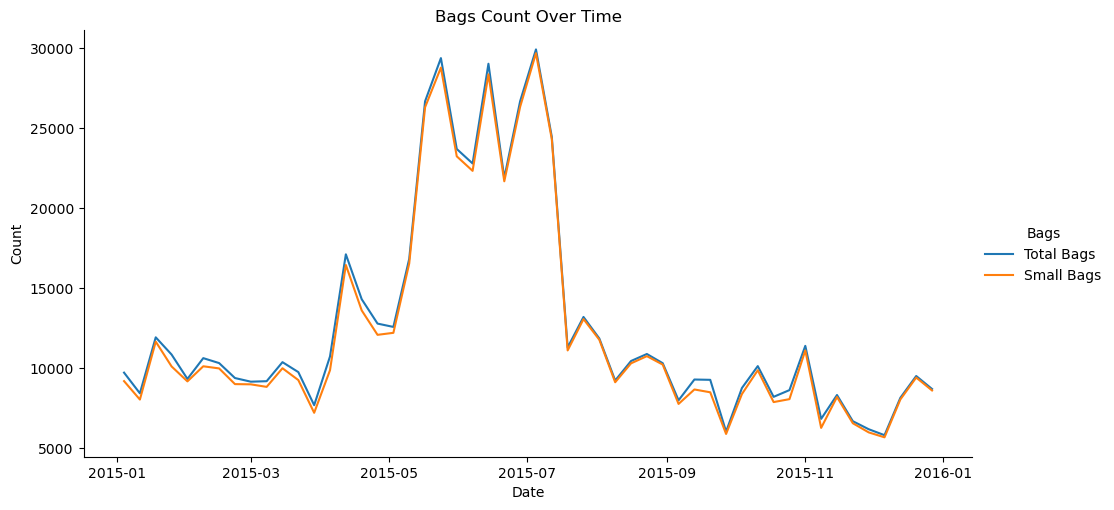

In [7]:
# write your code here
sns.relplot(data=data_melted, kind='line', x='Date', y='Count', hue='Bags', aspect=2)

# Customize the plot if needed
plt.title('Bags Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')

# Display the plot
plt.show()

##### 7.	Bin the data in the Total Volume column into four quantiles labeled ‘poor’, ‘modest’, ‘good’, and ‘excellent’, and store the bin labels in a new column.

In [8]:
# write your code here
data['Sales Volume'] = pd.qcut(data['Total Volume'], q=4, labels=['poor','modest','good','excellent'])
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Sales Volume
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,modest
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,modest
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,good
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,modest
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,modest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,modest
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,modest
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,modest
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,modest


##### 8.	Plot the binned data by year using a Seaborn count plot.

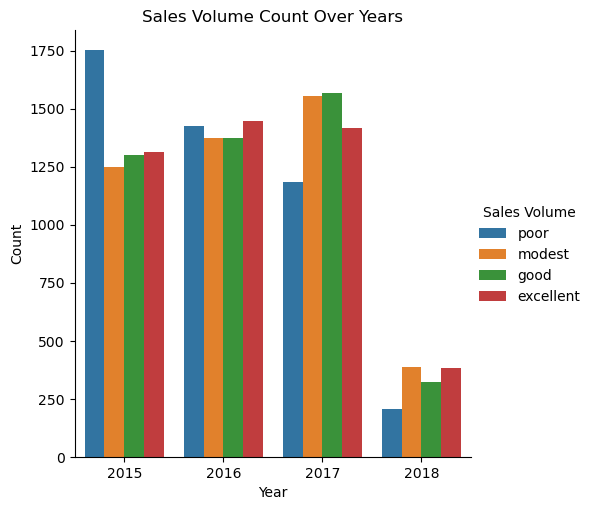

In [12]:
sns.catplot(data=data, kind='count', x='year', hue='Sales Volume')

# Customize the plot if needed
plt.title('Sales Volume Count Over Years')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.show()

##### 9.	Of the three bag sizes, which size sells the most? Hint: Melt the three bag size columns and plot the bags by year.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


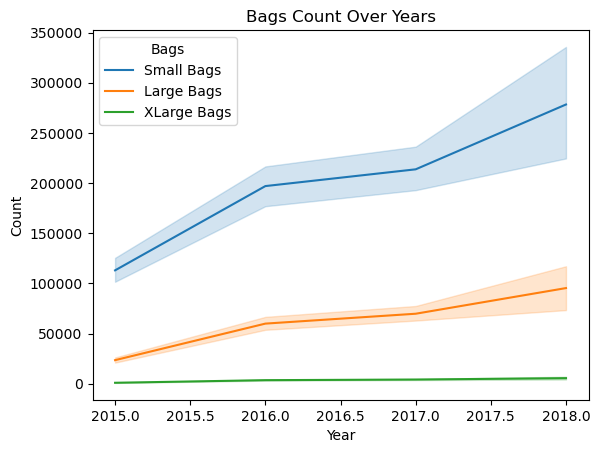

In [10]:
data_melted = data.melt(id_vars='year', value_vars=['Small Bags', 'Large Bags', 'XLarge Bags'],
                        var_name='Bags', value_name='Count')

# Create the line plot
sns.lineplot(data=data_melted, x='year', y='Count', hue='Bags')

# Customize the plot if needed
plt.title('Bags Count Over Years')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.show()

##### 10.	Which type of avocado sells the most?

In [11]:
# write your code here
data['Total Volume'].fillna(0, inplace=True)

# Now, try grouping and summing again
result = data.groupby('type')['Total Volume'].sum()
print(result)

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64
